In [1]:
from scipy.io import wavfile
from scipy import signal
import numpy as np
from matplotlib import pyplot as plt
import os

In [45]:
wav = "./dlwlrma2.wav"
# wav = "./dean_town.wav"
(file_dir, file_id) = os.path.split(wav)

print("Path:", file_dir)
print("Name:", file_id)

Path: .
Name: dlwlrma2.wav


In [46]:
sample_rate, data = wavfile.read(wav)

print("Sample rate:", sample_rate)
print("data size:", data.shape)
print("duration:", len(data) / sample_rate)

Sample rate: 4000
data size: (20000,)
duration: 5.0


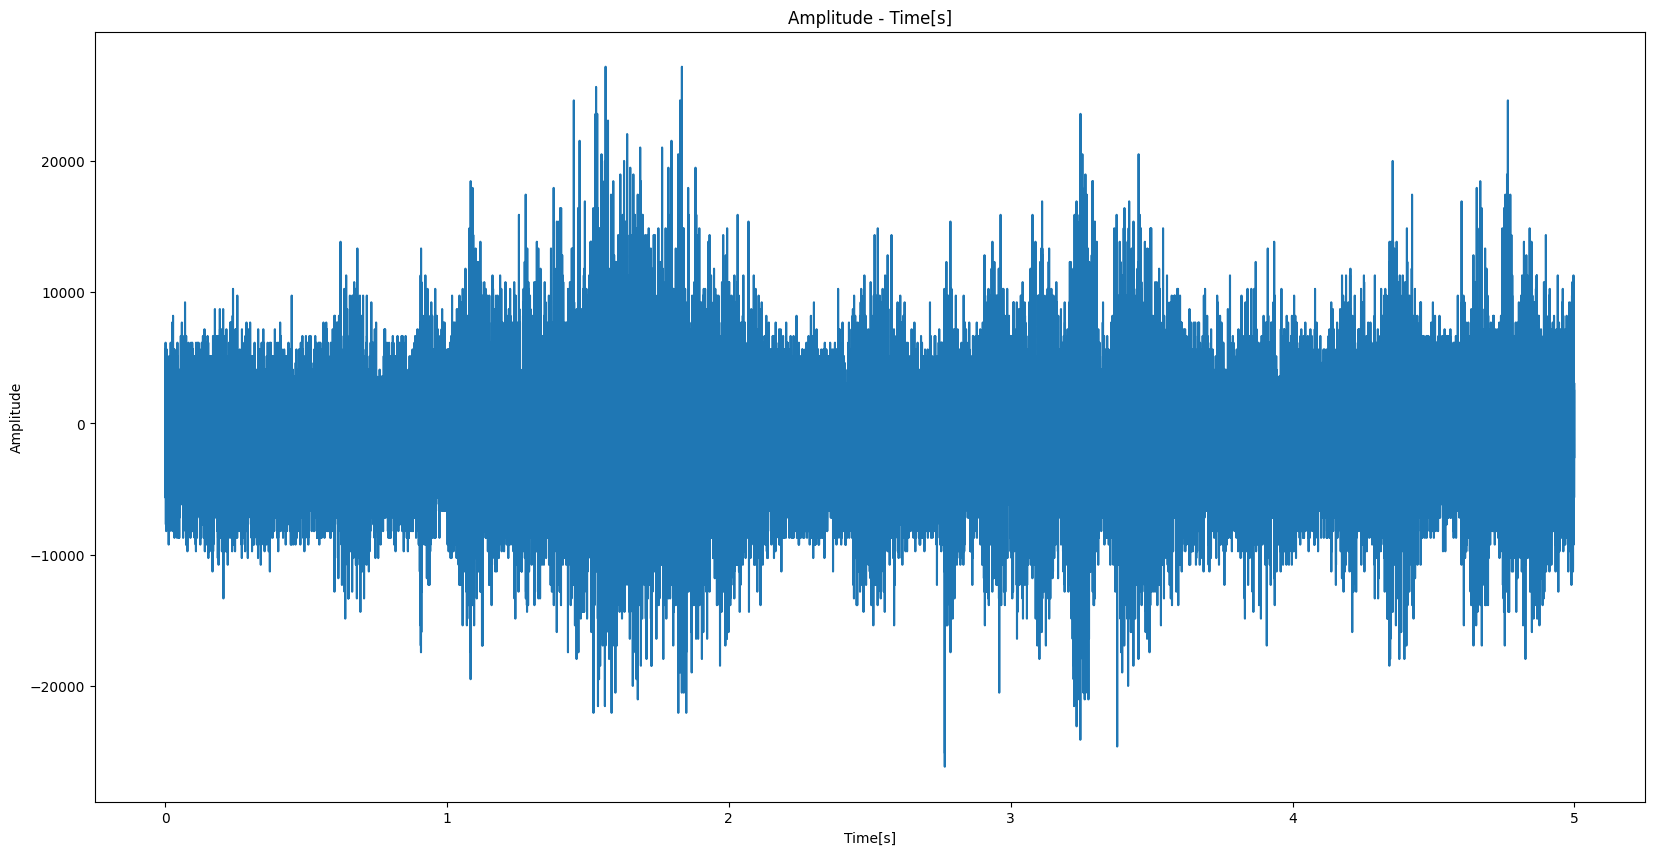

In [47]:
time = np.linspace(0, len(data)/sample_rate, len(data))

plt.figure(figsize = (20, 10))
plt.plot(time, data)
plt.ylabel("Amplitude")
plt.xlabel("Time[s]")
plt.title("Amplitude - Time[s]")
plt.show()

shape of fft: (20000,)
shape of magnitude: (20000,)


Text(0.5, 1.0, 'Power spectrum')

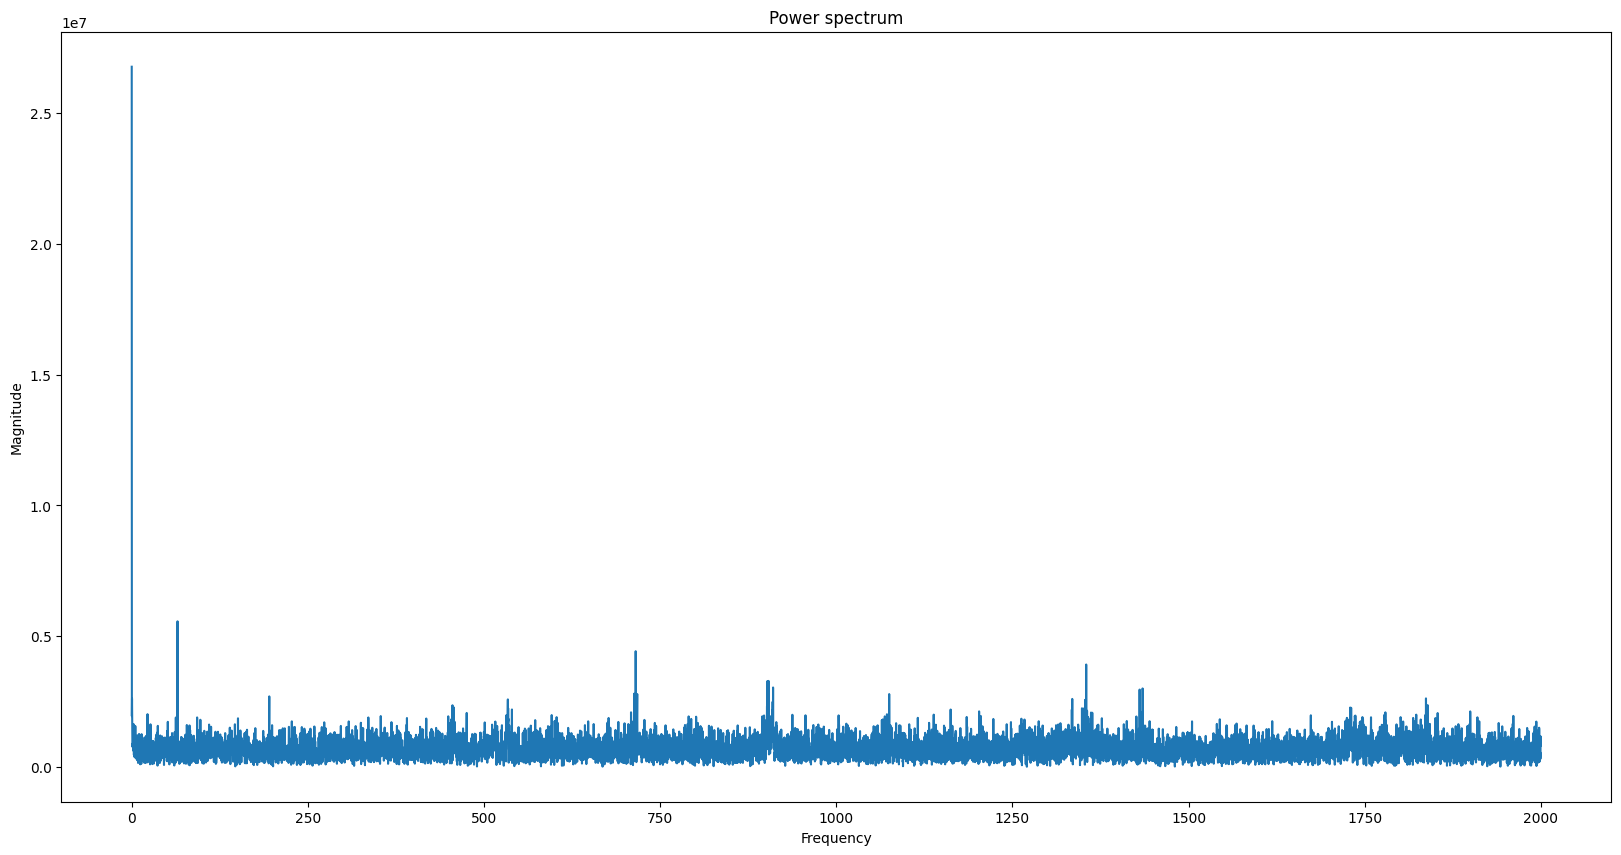

In [54]:
fft = np.fft.fft(data)
print("shape of fft:", fft.shape)

magnitude = np.abs(fft)
print("shape of magnitude:", magnitude.shape)

f = np.linspace(0, sample_rate, len(magnitude))
left_spectrum = magnitude[:int(len(magnitude)/2)]
left_f = f[:int(len(magnitude)/2)]

plt.figure(figsize = (20, 10))
plt.plot(left_f, left_spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

In [59]:
b = signal.firwin(101, cutoff = 1000, fs=sample_rate, pass_zero='lowpass')
data1 = signal.lfilter(b, [1.0], data)

shape of fft: (20000,)
shape of magnitude: (20000,)


Text(0.5, 1.0, 'Power spectrum')

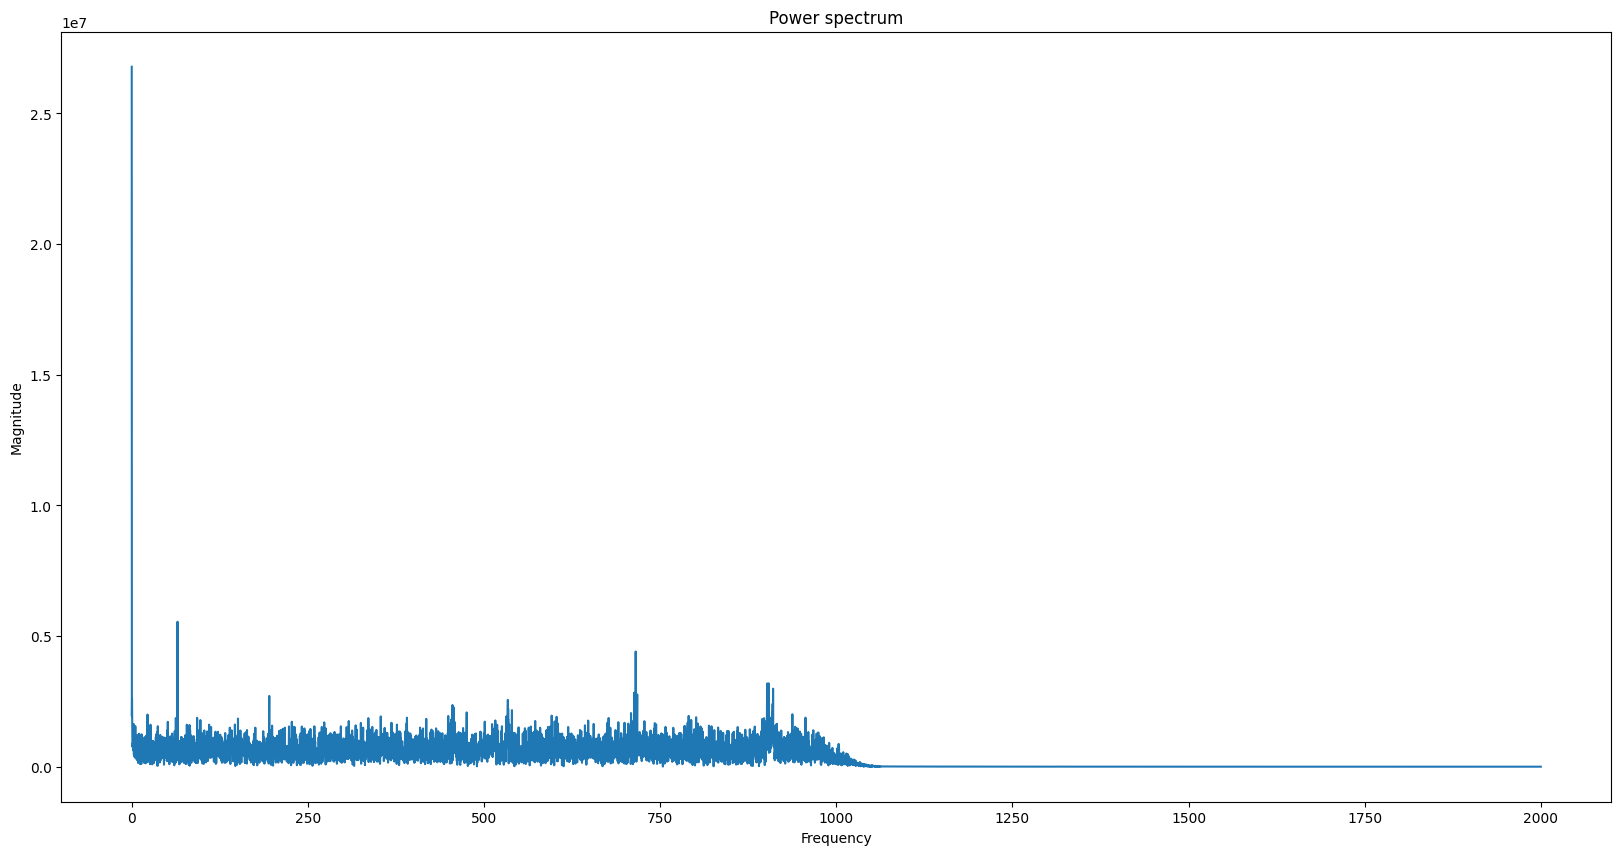

In [60]:
fft = np.fft.fft(data1)
print("shape of fft:", fft.shape)

magnitude = np.abs(fft)
print("shape of magnitude:", magnitude.shape)

f = np.linspace(0, sample_rate, len(magnitude))
left_spectrum = magnitude[:int(len(magnitude)/2)]
left_f = f[:int(len(magnitude)/2)]

plt.figure(figsize = (20, 10))
plt.plot(left_f, left_spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

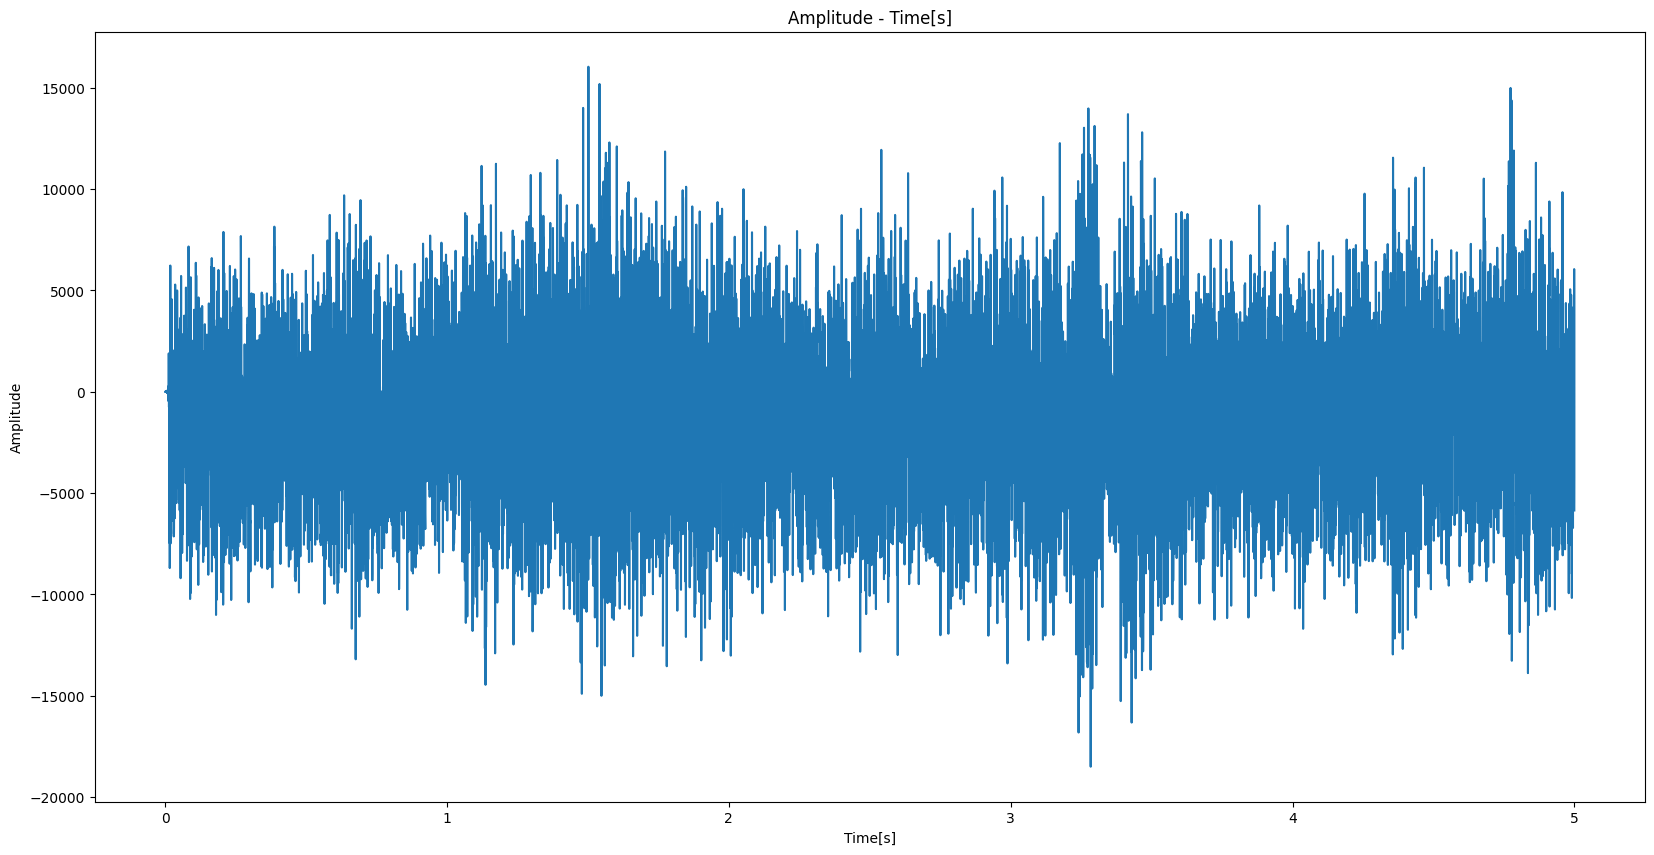

In [61]:
time = np.linspace(0, len(data1)/sample_rate, len(data1))

plt.figure(figsize = (20, 10))
plt.plot(time, data1)
plt.ylabel("Amplitude")
plt.xlabel("Time[s]")
plt.title("Amplitude - Time[s]")
plt.show()

In [62]:
wav_lpf = './dlwlrma2_lowpass_1000hz.wav'
wavfile.write(wav_lpf, sample_rate, data1.astype(np.int16))